Basic Python programs

In [12]:
#is_prime

def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

num = 29
if is_prime(num):
    print(f"{num} is a prime number.")
else:
    print(f"{num} is not a prime number.")


29 is a prime number.


In [13]:
# Two_Sum

def two_sum(nums, target):
    seen = {}
    for i, num in enumerate(nums):
        complement = target - num
        if complement in seen:
            return [seen[complement], i]
        seen[num] = i
    return None

nums = [2, 7, 11, 15]
target = 9
result = two_sum(nums, target)

if result:
    print(f"Indices that sum to {target} are: {result}")
else:
    print("No two numbers add up to the target.")


Indices that sum to 9 are: [0, 1]


Breadth-First Search (BFS)

In [3]:
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = [] # List for visited nodes.
queue = []     #Initialize a queue

def bfs(visited, graph, node): #function for BFS
  visited.append(node)
  queue.append(node)

  while queue:          # Creating loop to visit each node
    m = queue.pop(0)
    print (m, end = " ")

    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

# Driver Code
print("Following is the Breadth-First Search")
bfs(visited, graph, '5')

Following is the Breadth-First Search
5 3 7 2 4 8 

Depth-First Search (DFS)

In [2]:
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = set()

def dfs(visited, graph, node):
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

print("Following is the Depth-First Search")
dfs(visited, graph, '5')

Following is the Depth-First Search
5
3
2
4
8
7


Iterative Deepening Depth-First Search (IDFS)

In [5]:
from collections import defaultdict

n = int(input("Enter No of Nodes:"))
e = int(input("Enter No of Edge:"))

graph = defaultdict(list)

for i in range(e):
    i,j = map(int,input().split())
    graph[i].append(j)

def dfs(v,goal,limit):
    if v == goal:
        return 1;

    for i in graph[v]:
        if limit-1 >= 0:
            if dfs(i,goal,limit-1) !=  -1:
                return 1
    return -1


goal = int(input("Enter Goal:"))
limit = int(input("Enter Limit:"))

res = dfs(0,goal,limit)

if res == -1:
    print("not found")
else:
    print("found within depth limit")

Enter No of Nodes:6
Enter No of Edge:7
0 1
0 2
1 2
1 3
2 6
4 7
3 4
Enter Goal:6
Enter Limit:3
found within depth limit


Simple Plots: Bar, Scatter, Histogram, Box plot (using Matplotlib)

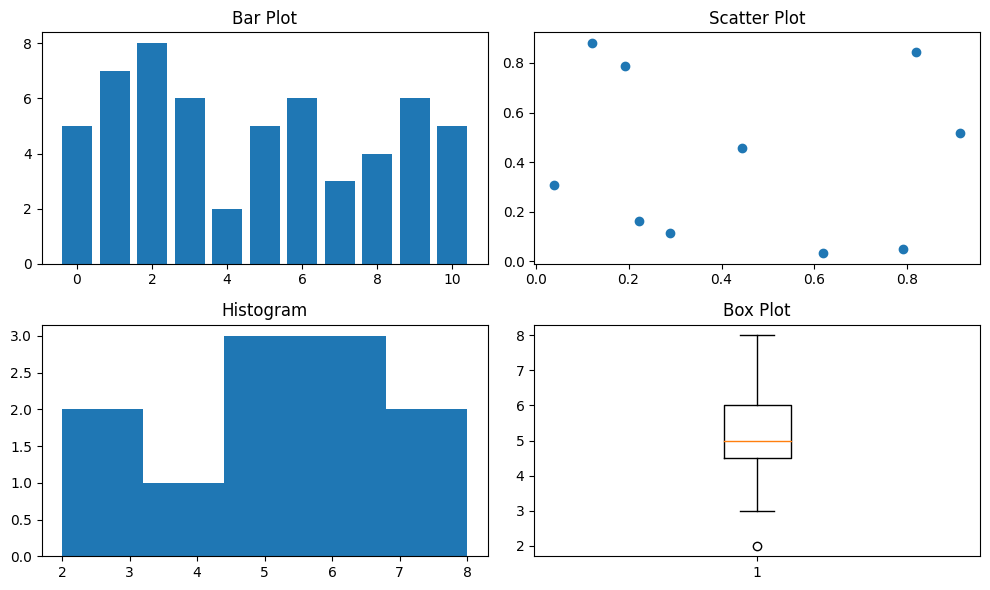

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
data = [5, 7, 8, 6, 2, 5, 6, 3, 4, 6, 5]

# Bar plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.bar(range(len(data)), data)
plt.title("Bar Plot")

# Scatter plot
plt.subplot(2, 2, 2)
x = np.random.rand(10)
y = np.random.rand(10)
plt.scatter(x, y)
plt.title("Scatter Plot")

# Histogram
plt.subplot(2, 2, 3)
plt.hist(data, bins=5)
plt.title("Histogram")

# Box Plot
plt.subplot(2, 2, 4)
plt.boxplot(data)
plt.title("Box Plot")

plt.tight_layout()
plt.show()


Random Movement

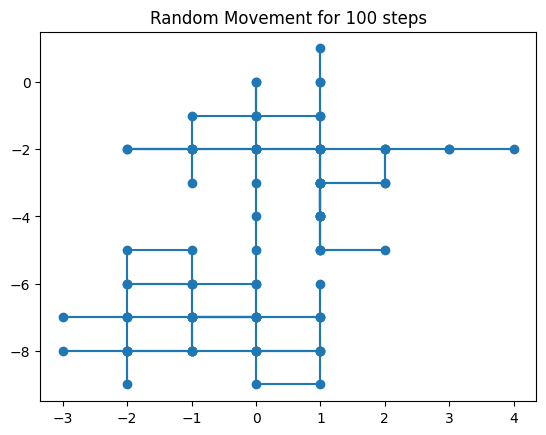

In [7]:
import random
import matplotlib.pyplot as plt

def random_movement(steps):
    x, y = [0], [0]
    for _ in range(steps):
        dx, dy = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        x.append(x[-1] + dx)
        y.append(y[-1] + dy)

    plt.plot(x, y, marker="o")
    plt.title(f"Random Movement for {steps} steps")
    plt.show()

random_movement(100)


A* Algorithm

In [11]:
from queue import PriorityQueue

class Graph:
    def __init__(self):
        self.edges = {}
        self.h = {}

    def neighbors(self, node):
        return self.edges[node]

    def get_cost(self, from_node, to_node):
        return self.edges[from_node][to_node]

def a_star_search(graph, start, goal):
    open_list = PriorityQueue()
    open_list.put((0, start))
    came_from = {}
    cost_so_far = {}

    came_from[start] = None
    cost_so_far[start] = 0

    while not open_list.empty():
        _, current = open_list.get()

        if current == goal:
            break

        for neighbor in graph.neighbors(current):
            new_cost = cost_so_far[current] + graph.get_cost(current, neighbor)
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + graph.h[neighbor]
                open_list.put((priority, neighbor))
                came_from[neighbor] = current

    return came_from, cost_so_far

# Example usage
graph = Graph()
graph.edges = {
    'A': {'B': 1, 'C': 3},
    'B': {'A': 1, 'D': 1, 'E': 5},
    'C': {'A': 3, 'F': 1},
    'D': {'B': 1},
    'E': {'B': 5, 'F': 2},
    'F': {'C': 1, 'E': 2}
}

graph.h = {
    'A': 6,
    'B': 4,
    'C': 4,
    'D': 3,
    'E': 2,
    'F': 0
}

came_from, cost_so_far = a_star_search(graph, 'A', 'F')
print("Path from A to F:", came_from)


Path from A to F: {'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C'}
